Gruppe: Leandro Borzyk, Malte Bauer, Florian Schrittwieser

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy import signal
from tensorflow import keras

In [2]:
img = np.load("resources/sample.npy")
img = np.floor(img / 2)
fltr =np.load("resources/filter.npy")

In [3]:
def Myconv2d(a,b):
    a = np.array(a)
    b = np.array(b)
    a_shape = np.shape(a)
    b_shape = np.shape(b)
    res_shape1 = np.abs(a_shape[0] - b_shape[0])+1
    res_shape2 = np.abs(a_shape[1] - b_shape[1])+1
    res=np.zeros([res_shape1, res_shape2])
    for i in range(res_shape1):
        for j in range(res_shape2):
            res[i,j] = np.sum(
                np.multiply(
                    np.flip(b), a[i:i + b_shape[0], j:j + b_shape[1]]))
    return res

In [4]:
Result_Imp = Myconv2d(img , fltr )
Result_Python = signal.convolve2d(img, fltr, mode ="valid")

checkup = np.sum(np.abs(Result_Imp - Result_Python))
print("The Error Valuse is:", checkup)

The Error Valuse is: 0.0


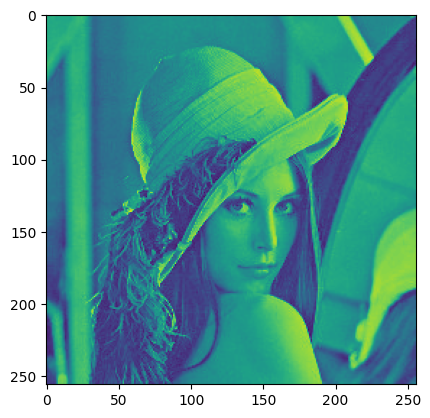

In [5]:
plt.imshow(img)

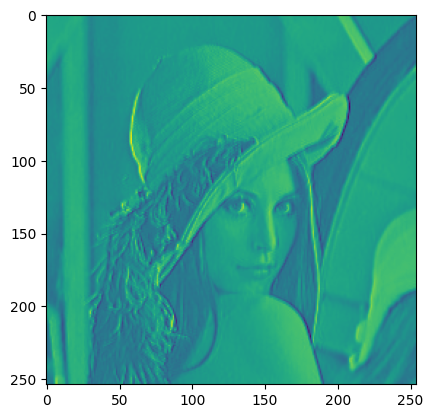

In [14]:
plt.imshow(Result_Imp)